# Evaluación de Modelos

---

Este notebook evalúa el rendimiento de los modelos locales (uno por cliente) y de los modelos globales obtenidos mediante distintos métodos de agregación:
- **FedAvg**
- **FedWeighted**
- **FedMedian**
- **FedTrimmedMean** (Extra)

Se utiliza el conjunto de prueba global (completo) de MNIST para medir:
- **Accuracy general**
- **Classification Report** (precision, recall, f1-score por clase)

## Importar liberías

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

## Cargar Dataset de prueba

In [2]:
# Cargar test set
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test / 255.0, -1)

## Evaluar Modelos

#### Modelos Locales

In [3]:
print("\n--- Evaluación de Modelos Locales ---\n")
for i in range(5):
    model_path = f"./local_training/client_model_{i}.keras"
    model = tf.keras.models.load_model(model_path)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    acc = accuracy_score(y_test, y_pred_classes)
    print(f"Cliente {i} - Accuracy: {acc:.4f}")


--- Evaluación de Modelos Locales ---

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cliente 0 - Accuracy: 0.9591
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cliente 1 - Accuracy: 0.9574
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cliente 2 - Accuracy: 0.9571
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Cliente 3 - Accuracy: 0.9590
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cliente 4 - Accuracy: 0.9650


#### Modelos Globales

In [4]:
# Ruta de los modelos
model_paths = {
    "FedAvg": "./federated_aggregation/global_model_fedavg.keras",
    "FedMedian": "./federated_aggregation/global_model_fedmedian.keras",
    "FedWeighted": "./federated_aggregation/global_model_fedweighted.keras",
    "FedTrimmedMean": "./federated_aggregation/global_model_fedtrimmedmean.keras"
}

# Evaluación
for name, path in model_paths.items():
    model = tf.keras.models.load_model(path)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    acc = accuracy_score(y_test, y_pred_classes)
    print(f"\n== Resultados para {name} ==")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred_classes, digits=4))

 51/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

c:\Users\blast\Documents\Blas\TEC\Universidad TEC\8vo Semestre\Desarrollo de proyectos\Computo en la Nube (Jesus A)\Clase 5\federado-mnist-tf\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

== Resultados para FedAvg ==
Accuracy: 0.5527
              precision    recall  f1-score   support

           0     0.9714    0.3816    0.5480       980
           1     0.9988    0.7101    0.8301      1135
           2     0.8325    0.6502    0.7301      1032
           3     0.8346    0.2149    0.3417      1010
           4     0.9104    0.7138    0.8002       982
           5     0.5438    0.7309    0.6236       892
           6     1.0000    0.0595    0.1123       958
           7     0.9815    0.7228    0.8325      1028
           8     0.2121    0.9897    0.3493       974
           9     0.8261    0.3389    0.4807      1009

    accuracy                         0.5527     10000
   macro avg     0.8111    0.5513    0.5649     10000
weighted avg     0.8174    0.5527    0.5709     10000

 51/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

c:\Users\blast\Documents\Blas\TEC\Universidad TEC\8vo Semestre\Desarrollo de proyectos\Computo en la Nube (Jesus A)\Clase 5\federado-mnist-tf\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

== Resultados para FedMedian ==
Accuracy: 0.6750
              precision    recall  f1-score   support

           0     0.9816    0.5980    0.7432       980
           1     0.9888    0.8537    0.9163      1135
           2     0.6237    0.7500    0.6810      1032
           3     0.8030    0.6297    0.7059      1010
           4     0.8726    0.6415    0.7394       982
           5     0.3686    0.9013    0.5233       892
           6     1.0000    0.0543    0.1030       958
           7     0.9276    0.7481    0.8282      1028
           8     0.6166    0.6622    0.6386       974
           9     0.5673    0.8771    0.6890      1009

    accuracy                         0.6750     10000
   macro avg     0.7750    0.6716    0.6568     10000
weighted avg     0.7809    0.6750    0.6644     10000

 53/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step

c:\Users\blast\Documents\Blas\TEC\Universidad TEC\8vo Semestre\Desarrollo de proyectos\Computo en la Nube (Jesus A)\Clase 5\federado-mnist-tf\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

== Resultados para FedWeighted ==
Accuracy: 0.5527
              precision    recall  f1-score   support

           0     0.9714    0.3816    0.5480       980
           1     0.9988    0.7101    0.8301      1135
           2     0.8325    0.6502    0.7301      1032
           3     0.8346    0.2149    0.3417      1010
           4     0.9104    0.7138    0.8002       982
           5     0.5438    0.7309    0.6236       892
           6     1.0000    0.0595    0.1123       958
           7     0.9815    0.7228    0.8325      1028
           8     0.2121    0.9897    0.3493       974
           9     0.8261    0.3389    0.4807      1009

    accuracy                         0.5527     10000
   macro avg     0.8111    0.5513    0.5649     10000
weighted avg     0.8174    0.5527    0.5709     10000

 39/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

c:\Users\blast\Documents\Blas\TEC\Universidad TEC\8vo Semestre\Desarrollo de proyectos\Computo en la Nube (Jesus A)\Clase 5\federado-mnist-tf\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

== Resultados para FedTrimmedMean ==
Accuracy: 0.7107
              precision    recall  f1-score   support

           0     0.9116    0.7786    0.8398       980
           1     0.9949    0.8546    0.9194      1135
           2     0.7364    0.8663    0.7961      1032
           3     0.9163    0.4337    0.5887      1010
           4     0.9166    0.6711    0.7748       982
           5     0.4948    0.8587    0.6279       892
           6     1.0000    0.1785    0.3029       958
           7     0.9676    0.7850    0.8668      1028
           8     0.4160    0.9281    0.5745       974
           9     0.6993    0.7284    0.7136      1009

    accuracy                         0.7107     10000
   macro avg     0.8054    0.7083    0.7005     10000
weighted avg     0.8113    0.7107    0.7065     10000



## Gráfico Comparativo

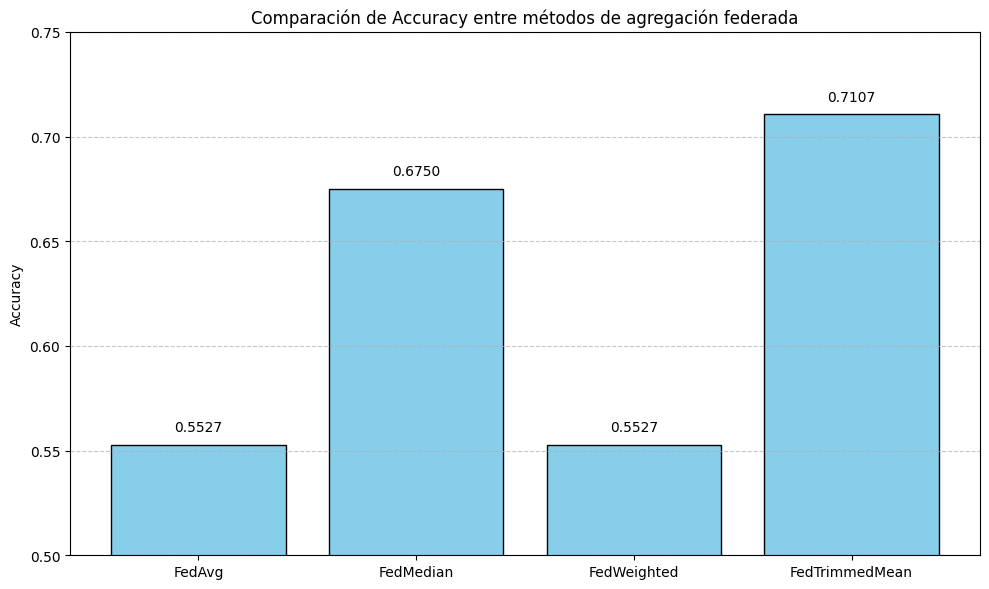

In [6]:
# Nombres de los métodos y sus accuracies
model_names = ["FedAvg", "FedMedian", "FedWeighted", "FedTrimmedMean"]
accuracies = [0.5527, 0.6750, 0.5527, 0.7107]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0.5, 0.75)
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy entre métodos de agregación federada")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.4f}",
            ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()